In [1]:

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
import os
data_dir = os.path.join(os.getcwd(),'chest_radiography')

In [3]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4200 files belonging to 2 classes.
Using 3360 files for training.


In [4]:
class_names=['normal','tuberculosis']

In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4200 files belonging to 2 classes.
Using 840 files for validation.


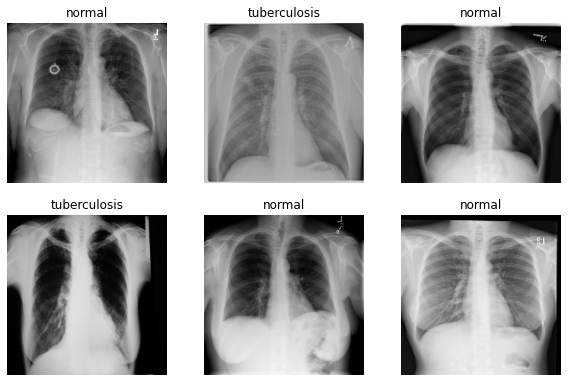

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
ResNet50V2_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling='avg',
    classes=2,
    classifier_activation="softmax",
  
)

for layer in pretrained_model.layers:
        layer.trainable=False

ResNet50V2_model.add(pretrained_model)

94668760/94668760 [==============================] - 4s 0us/step


In [12]:
ResNet50V2_model.add(tf.keras.layers.Flatten())
ResNet50V2_model.add(tf.keras.layers.Dense(512, activation='relu'))
ResNet50V2_model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [13]:
ResNet50V2_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24,614,914
Trainable params: 1,050,114
Non-trainable params: 23,564,800
_________________________________________________________________


In [14]:
ResNet50V2_model.compile(optimizer=Adam(learning_rate=0.001), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [15]:
history = ResNet50V2_model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10


C:\Users\JAYA MENON\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


105/105 [==============================] - 446s 4s/step - loss: 13.1630 - accuracy: 0.8839 - val_loss: 1.1680 - val_accuracy: 0.9452
Epoch 2/10
105/105 [==============================] - 361s 3s/step - loss: 3.3124 - accuracy: 0.9137 - val_loss: 3.6938 - val_accuracy: 0.9143
Epoch 3/10
105/105 [==============================] - 696s 7s/step - loss: 2.4174 - accuracy: 0.9235 - val_loss: 9.3999 - val_accuracy: 0.8810
Epoch 4/10
105/105 [==============================] - 1311s 13s/step - loss: 2.0161 - accuracy: 0.9333 - val_loss: 0.8111 - val_accuracy: 0.9714
Epoch 5/10
105/105 [==============================] - 573s 5s/step - loss: 1.0455 - accuracy: 0.9548 - val_loss: 1.3808 - val_accuracy: 0.9583
Epoch 6/10
105/105 [==============================] - 350s 3s/step - loss: 2.2618 - accuracy: 0.9360 - val_loss: 1.6434 - val_accuracy: 0.9512
Epoch 7/10
105/105 [==============================] - 348s 3s/step - loss: 1.9882 - accuracy: 0.9366 - val_loss: 2.3267 - val_accuracy: 0.9405
Epoch 8

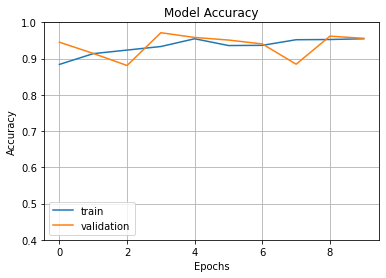

In [16]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [13]:
import cv2
#image=cv2.imread('C:\Users\JAYA MENON\Group_Project\chest_radiography\tuberculosis\Tuberculosis-27.png')
image=cv2.imread('C:\\Users\\JAYA MENON\\Group_Project\\chest_radiography\\tuberculosis\\Tuberculosis-27.png')
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

In [14]:
pred=ResNet50V2_model.predict(image)

1/1 [==============================] - 4s 4s/step


In [15]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is tuberculosis
